<a href="https://colab.research.google.com/github/matheusiack18/Modelos_Lineares-/blob/main/Trab2Modlineares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2

- Questão 1: Considerando o conjunto dados, responda as questões abaixo considerando o modelo de regressão linear multivariado:


In [ ]:
# Importando as bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import random

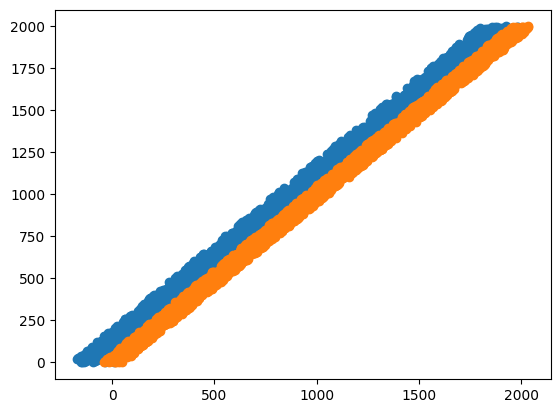

In [ ]:
# Letra a) Faça o grafico de dispersão bidimensional (XY) entre a variavel y e cada uma das variaveis regressoras X1,...,Xp (p graficos separados)

x1 = []
x2 = []
y = []

for i in range(2000):
  y.append(i)
  x1.append(random.randint(i-200, i+20))
  x2.append(random.randint(i-50, i+50))

plt.scatter(x1, y)
plt.scatter(x2, y)
plt.show()

In [ ]:
# Letra b) Estime a correlação entre a variavel Y e cada uma das variaveis regressoras (p(Y,Xi)). Comente!
def coeficiente_de_correlacao(x, y):
  # primeiro: cálculo de beta 1
  xiyi_sum = 0
  yi_sum = 0
  xi_sum = 0
  xi2_sum = 0
  squareSumxi = 0
  for i in range(len(x)):
    xiyi_sum += x[i]*y[i]
    yi_sum += y[i]
    xi_sum += x[i]
    xi2_sum += x[i]**2

  squareSumxi = xi_sum ** 2

  beta1 = ((xiyi_sum) - ((1/len(x))*(xi_sum)*(yi_sum))) / ((xi2_sum) - (1/len(x) * squareSumxi))

  # segundo: cálculo do coeficiente de correlação

  sxx = 0
  syy = 0

  for i in range(len(x)):
    sxx += (x[i] - np.mean(x)) ** 2
    syy += (y[i] - np.mean(y)) ** 2

  coeficiente_de_correlacao = ((beta1) * (sxx/syy)**(1/2))

  return coeficiente_de_correlacao

print(f"Os coeficientes de correlação entre x1 e x2 são, respectivamente, {coeficiente_de_correlacao(x1, y)} e {coeficiente_de_correlacao(x2, y)}")

Os coeficientes de correlação entre x1 e x2 são, respectivamente, 0.9940368257172799 e 0.9987997911102467


In [ ]:
# Letra d) Encontre o hiperplano de quadrados minimos (estime B0, B1,...,Bp).

# Construção da matriz X
X = np.column_stack((np.ones_like(x1), x1, x2))

# Cálculo dos coeficientes B usando a fórmula de mínimos quadrados:
B = np.linalg.inv(X.T @ X) @ X.T @ y

print("Os valores de b0, b1 e b2 são, respectivamente,", B)

Os valores de b0, b1 e b2 são, respectivamente, [16.58236504  0.1678219   0.83063602]


In [ ]:
# Letra c) Calcule o coeficiente de Determinação R2(Y, Xi) entre a variavel Y e cada uma das variaveis regressoras. E por ultimo e para comentar o resultado

def calcular_r_quadrado(x, y):

    ymed = np.mean(y) # Calcula a média de y

    syy = np.sum((y - ymed)**2) # Calcula a soma dos quadrados total (SST)


    # Calcula a soma dos quadrados da regressão (SSR)
    b = np.sum((x - np.mean(x)) * (y - ymed)) / np.sum((x - np.mean(x))**2)
    a = ymed - (b * np.mean(x))
    y_pred = a + b * np.array(x)  # Converta x para um array do NumPy
    sqreg = np.sum((y_pred - ymed)**2)

    r_quadrado = sqreg / syy # Calcular o coeficiente de determinação R²

    return r_quadrado

# Calcular R² para cada variável regressora
r_quadrado_x1 = calcular_r_quadrado(x1, y)
r_quadrado_x2 = calcular_r_quadrado(x2, y)

# Exibir resultados
print(f"O coeficiente de determinação para x1: R² = {r_quadrado_x1:.2f}")
print(f"O coeficiente de determinação para x2: R² = {r_quadrado_x2:.2f}")

O coeficiente de determinação para x1: R² = 0.99
O coeficiente de determinação para x2: R² = 1.00


In [ ]:
# # y = 18.03 + 0.17 * x1 + 0.83 * x2
# y_previsto = []

# for i in range(len(x1)):
#   y_previsto.append(resultado[0] + resultado[1] * x1[i] + resultado[2] * x2[i])

# plt.plot(y_previsto)
# plt.show()

Valores estimados de y (y_pred): [-1.58311982e+00  3.70079875e+00 -3.44152501e+01 ...  1.99784840e+03
  2.02814625e+03  2.02832255e+03]


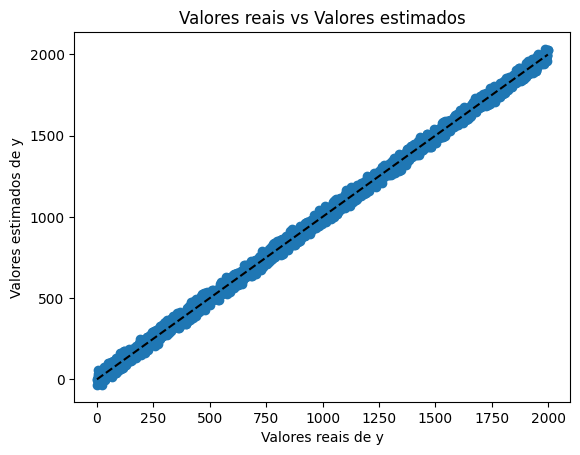

In [ ]:
# Letra e) Calcule os valores estimados de y (ou seja, ^y) atraves do hiperplano estimado na letra D

y_pred = X @ B

print("Valores estimados de y (y_pred):", y_pred)

plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], '--k')  # Linha de referência y = x
plt.xlabel("Valores reais de y")
plt.ylabel("Valores estimados de y")
plt.title("Valores reais vs Valores estimados")
plt.show()

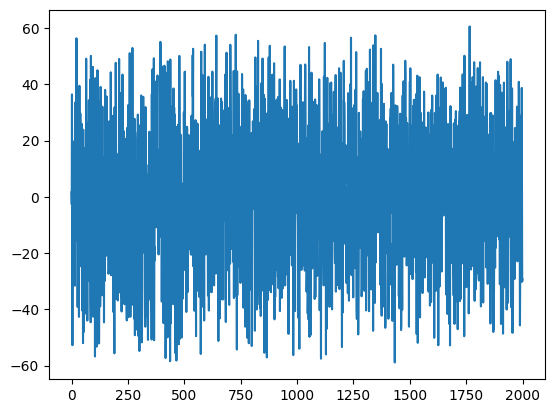

In [ ]:
# Letra f) Calcule os residuos, ou seja, o erro de estimação y - ^y

residuos = []
for i in range(len(x1)):
  residuos.append(y[i] - y_pred[i])

plt.plot(residuos)

(array([ 61., 137., 246., 261., 288., 312., 313., 232., 114.,  36.]),
 array([-58.92515863, -46.97621272, -35.02726681, -23.0783209 ,
        -11.12937499,   0.81957092,  12.76851683,  24.71746274,
         36.66640865,  48.61535456,  60.56430047]),
 <BarContainer object of 10 artists>)

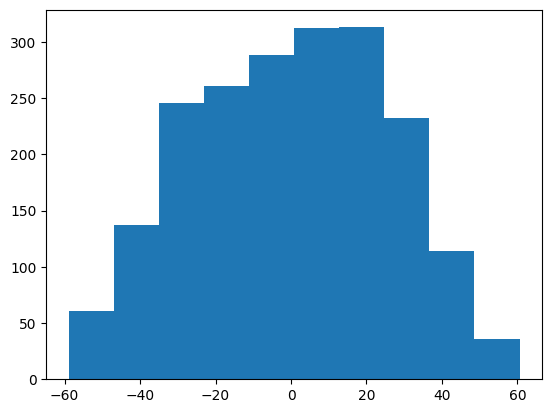

In [ ]:
# Letra g) Faça o Histograma dos erros de estimação encontrados no item anterior. E por ultimo comente sobre sua caracteristica

(n, bins) = np.histogram(residuos, 10)
plt.hist(residuos, bins=bins)
